In [3]:
import os
import yaml
import numpy as np
import xarray as xr
import dask
import matplotlib.pyplot as plt

In [10]:
# read info about meanfield from yaml file
filename = os.path.join("/ec/res4/hpcperm/itas/src/github/stece/osprey", 'meanfield.yaml')
with open(filename) as yamlfile:
    info = yaml.load(yamlfile, Loader=yaml.FullLoader)

In [12]:
info['expname']

'lfr0'

In [2]:
from osprey.actions.postreader import postreader_nemo

In [3]:
data = postreader_averaged(expname='lfr0', startyear=1990, endyear=2060, varlabel='thetao', diagname='timeseries', replace=False, metric='diff')

2024-09-13 10:45:41,117 - INFO - File to be loaded /perm/itas/ece4/lfr0/nemo/timeseries_thetao_diff_1990-2060.nc
2024-09-13 10:45:42,470 - INFO - Averaged data found.


In [4]:
gdata = postreader_averaged(expname='FE01', startyear=1990, endyear=2059, varlabel='thetao', diagname='timeseries', replace=False, metric='diff')

2024-09-13 10:45:44,984 - INFO - File to be loaded /perm/itas/ece4/FE01/nemo/timeseries_thetao_diff_1990-2059.nc
2024-09-13 10:45:45,254 - INFO - Averaged data found.


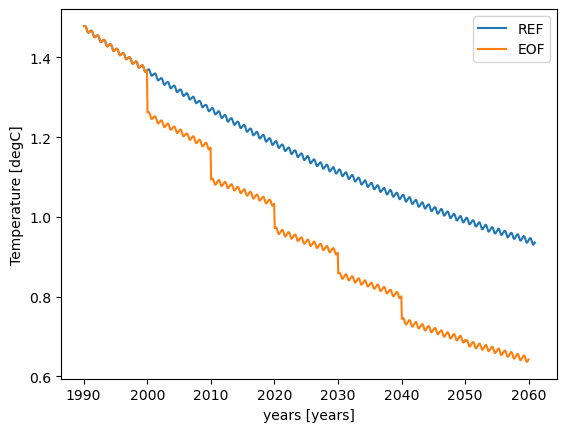

In [5]:
data['thetao'].plot()
gdata['thetao'].plot()
plt.gca().legend(['REF','EOF'])

In [7]:
pdata = postreader_averaged(expname='FE01', startyear=1990, endyear=2059, varlabel='thetao-pyc', diagname='timeseries', replace=False, metric='base')

2024-09-09 08:28:04,091 - INFO - File to be loaded /perm/itas/ece4/FE01/nemo/timeseries_thetao-pyc_base_1990-2059.nc
2024-09-09 08:28:04,110 - INFO - Averaged data found.


In [8]:
mdata = postreader_averaged(expname='FE01', startyear=1990, endyear=2059, varlabel='tos', diagname='timeseries', replace=False, metric='base')

2024-09-09 08:28:04,116 - INFO - File to be loaded /perm/itas/ece4/FE01/nemo/timeseries_tos_base_1990-2059.nc
2024-09-09 08:28:04,142 - INFO - Averaged data found.


In [9]:
bdata = postreader_averaged(expname='FE01', startyear=1990, endyear=2059, varlabel='sbt', diagname='timeseries', replace=False, metric='base')

2024-09-09 08:28:04,148 - INFO - File to be loaded /perm/itas/ece4/FE01/nemo/timeseries_sbt_base_1990-2059.nc
2024-09-09 08:28:04,656 - INFO - Averaged data found.


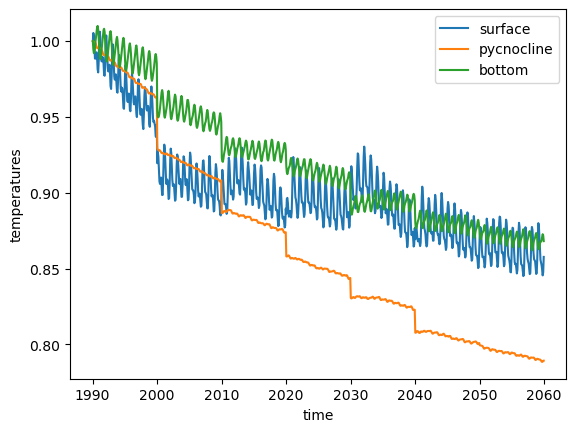

In [18]:
(mdata['tos']/mdata['tos'].isel(time=0)).plot()
(pdata['thetao-pyc']/pdata['thetao-pyc'].isel(time=0)).plot()
(bdata['sbt']/bdata['sbt'].isel(time=0)).plot()
plt.ylabel('temperatures')
plt.xlabel('time')
plt.gca().legend(['surface','pycnocline','bottom'])